<a href="https://colab.research.google.com/github/poorghorban/Classification-Amazon-Cellphone-Reviews/blob/master/classification_amazon_cellphone_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Amazon Cellphone Reviews Project**

requirment:
- python 3.x
- pip install pandas
- pip install tensorflow
- pip install keras 
- pip install matplotlib
- pip install nltk
- pip install gensim

##**Step1: Loading Data**

In [1]:
import pandas as pd 
import tensorflow as tf

In [2]:
## dataset url
DATA_URL = "https://raw.githubusercontent.com/poorghorban/Classification-Amazon-Cellphone-Reviews/master/data/amazon_cellphone_reviews.csv"

In [3]:
## download data from url 
data_file_path = tf.keras.utils.get_file("amazon_cellphone_reviews.csv",DATA_URL)

In [4]:
## path file 
data_file_path

'/root/.keras/datasets/amazon_cellphone_reviews.csv'

In [5]:
## read data from file 
df = pd.read_csv("/root/.keras/datasets/amazon_cellphone_reviews.csv")

In [6]:
## show data 
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [7]:
## data shape
df.shape

(67986, 8)

#### **Missing Value**

In [8]:
## check exsist missing value
df.isnull().sum()

asin                0
name                2
rating              0
date                0
verified            0
title              14
body               21
helpfulVotes    40771
dtype: int64

In [9]:
## remove column 'helpfulVotes' - missing value are to high
del df['helpfulVotes']

In [10]:
## drop rows where at least one element is missing
df = df.dropna()
df.isnull().sum()

asin        0
name        0
rating      0
date        0
verified    0
title       0
body        0
dtype: int64

In [11]:
## concate two columns 'title' and 'body'
df['review'] = df['title'] + ' ' + df['body']

In [12]:
## need two columns 'rating'(label) and 'title_body'(features)
df = df[['rating','review']]

In [13]:
## new data
df.head()

,rating,review
0,3,"Def not best, but not worst I had the Samsung ..."
1,1,Text Messaging Doesn't Work Due to a software ...
2,5,"Love This Phone This is a great, reliable phon..."
3,3,"Love the Phone, BUT...! I love the phone and a..."
4,4,"Great phone service and options, lousy case! T..."


In [14]:
## data shape
df.shape

(67954, 2)

## **Step2: Analysing Data**

In [ ]:
import matplotlib.pyplot as plt

#### **Bar plot rating**

In [ ]:
## find unique rank and counts
b = df['rating'].value_counts()
rank , rank_counts = list(b.index) , list(b.values)

Text(0.5, 0.98, 'Bar Plot Counts of Rating')

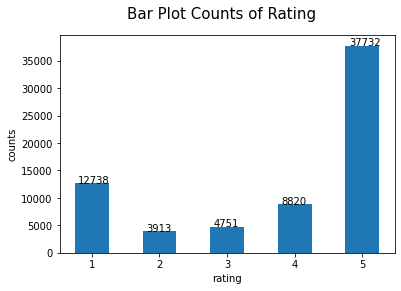

In [ ]:
## bar plot 
#plt.figure(figsize=(10,5))
bars = plt.bar(x=rank , height=rank_counts , width=0.5)
xlocs, xlabs = plt.xticks()
xlocs=[i for i in rank]
xlabs=[i for i in rank]
plt.xlabel('rating')
plt.ylabel('counts')
plt.xticks(xlocs, xlabs)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.05, yval + 0.005, yval)
plt.suptitle('Bar Plot Counts of Rating' , fontsize=15)

#### **Box plot length of text reviews**

In [ ]:
## find length of texts 
len_texts = df['review'].apply(lambda t : len(t)).values

Text(0.5, 0.98, 'Box Plot Length of Text Review')

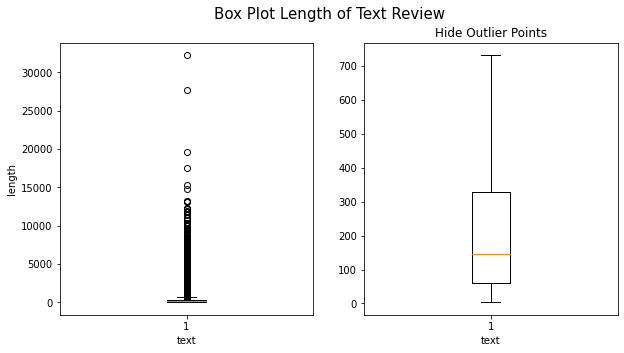

In [ ]:
fig , (ax1,ax2) = plt.subplots(nrows=1 , ncols=2 , figsize=(10,5))
## box plot 
ax1.boxplot(len_texts)
ax1.set_xlabel('text')
ax1.set_ylabel('length')
## box plot with hide outlier points
ax2.boxplot(len_texts , showfliers=False)
ax2.set_title('Hide Outlier Points')
ax2.set_xlabel('text')
plt.suptitle('Box Plot Length of Text Review' , fontsize=15)

## **Step3 : Train and Validation Sets**

In [15]:
## hyperparameter 
training_portion = 0.8

In [16]:
## split data to train and valiation sets
train=df.sample(frac=training_portion,random_state=200) #random state is a seed value
validation=df.drop(train.index)

In [17]:
## show train set
train.head()

,rating,review
19375,5,El celular está en buenas condiciones Ubicar e...
67536,3,Okay phone with mediocre battery life. They re...
29537,3,Buy a phone with a warranty. Seems like they a...
55767,5,Nice phone Bought this for my 11 year old daug...
31352,5,Best purchase Bought this for my business. It ...


In [18]:
## train set shape
train.shape

(54363, 2)

In [19]:
## show validation set
validation.head()

,rating,review
2,5,"Love This Phone This is a great, reliable phon..."
3,3,"Love the Phone, BUT...! I love the phone and a..."
4,4,"Great phone service and options, lousy case! T..."
5,4,"Worked great for me Hello, I have this phone a..."
17,1,Phones locked 1 star because the phones locked...


In [20]:
## validation set shape
validation.shape

(13591, 2)

## **Step4: Preprocessing Data**

In [21]:
import string 
import nltk

In [ ]:
## download nltk library 
nltk.download("popular")

In [23]:
def clean_text(text):
  # convert to lowercase
  text = text.lower()
  # remove punctuation and digits 
  punc_digits = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789\n\t'
  text = text.translate(str.maketrans('','',punc_digits))
  # tokenize 
  tokens = nltk.word_tokenize(text)
  # lemmatize and remove stopwords
  stopwords = nltk.corpus.stopwords.words('english')
  lemmatizer = nltk.stem.WordNetLemmatizer()
  new_text = ''
  for token in tokens:
    # word rooting
    token = lemmatizer.lemmatize(token)
    if token not in stopwords:
      # not stopword add to array
      new_text = new_text + ' ' + token
  return new_text

In [24]:
## preprocessing train set 
train['review'] = train['review'].map(lambda t: clean_text(t))

In [25]:
## show train set
train.head()

,rating,review
19375,5,el celular está en buenas condiciones ubicar ...
67536,3,okay phone mediocre battery life really need ...
29537,3,buy phone warranty seems like break year grea...
55767,5,nice phone bought year old daughter replace z...
31352,5,best purchase bought business work great cost...


In [26]:
## preprocessing validation set
validation['review'] = validation['review'].apply(lambda t: clean_text(t))

In [27]:
## show validation set
validation.head()

,rating,review
2,5,love phone great reliable phone also purchase...
3,3,love phone love phone really need one didnt e...
4,4,great phone service option lousy case phone h...
5,4,worked great hello phone used decided buy fli...
17,1,phone locked star phone locked pay additional...


## **Step5: Extract Features**

In [28]:
## hyperparameters 
max_length = 200
oov_token = '<OOV>'
trunc_type = 'post'
padding_type = 'post'
embedding_dim = 100

#### **Text Data Vectorization**

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
## create tokenizer
tokenizer = Tokenizer(oov_token= oov_token)
tokenizer.fit_on_texts(train['review'])

In [31]:
## list of word index 
word_index = tokenizer.word_index 
display(len(word_index))
display(dict(list(word_index.items())[0:10]))

37446

{'<OOV>': 1,
 'battery': 7,
 'good': 5,
 'great': 4,
 'like': 10,
 'one': 9,
 'phone': 2,
 'screen': 8,
 'wa': 3,
 'work': 6}

In [32]:
## convert text to vector with same size 
train_sequences = tokenizer.texts_to_sequences(train['review'])
x_train = pad_sequences(train_sequences,maxlen=max_length,padding=padding_type , truncating=trunc_type)
y_train = train['rating'].to_numpy().reshape((-1,1))

In [33]:
## train set shape 
display(x_train.shape)
display(y_train.shape)

(54363, 200)

(54363, 1)

In [34]:
## convert text to vector with same size 
validation_sequences = tokenizer.texts_to_sequences(validation['review'])
x_validation = pad_sequences(validation_sequences,maxlen=max_length,padding=padding_type , truncating=trunc_type)
y_validation = validation['rating'].to_numpy().reshape((-1,1))

In [35]:
## validation set shape
display(x_validation.shape)
display(y_validation.shape)

(13591, 200)

(13591, 1)

#### **Embedding Matrix with Word2Vec**

In [ ]:
from gensim.models import Word2Vec
import numpy as np 
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
## hyperparameter 
vocab_size = len(word_index) + 1

In [ ]:
## convert text to list of words
docs = []
for doc in train['review'].tolist(): 
  docs.append(doc.split())

In [ ]:
## create model 
model = Word2Vec(docs ,min_count=1, size=embedding_dim , window=5,workers=4)
print(model)

Word2Vec(vocab=37445, size=100, alpha=0.025)


In [ ]:
vocabulary = list(model.wv.vocab)
vectors = model[model.wv.vocab]

In [ ]:
## create dictionary (key , value) - emdeddings_index(word , vector)
embeddings_index = {}
for i , word in enumerate(vocabulary):
  embeddings_index[word] = vectors[i]

In [ ]:
## convert word in word_index to vector
embedding_matrix = np.random.random((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
## data shape
embedding_matrix.shape

(37447, 100)

#### **Embedding Matrix with GloVe**

In [36]:
from google.colab import drive 
import zipfile 
import numpy as np 

In [37]:
## hyperparameter 
vocab_size = len(word_index) + 1

In [38]:
drive.mount('/content/drive/' , force_remount=True)

Mounted at /content/drive/


In [39]:
## GloVe_100d url
GloVe_URL = "/content/drive/My Drive/Google Colab/glove.6B.100d.zip"

In [40]:
zip_ref = zipfile.ZipFile(GloVe_URL,'r')
zip_ref.extractall('/content/drive/My Drive/Google Colab/')
zip_ref.close()

In [41]:
GloVe_file_path = "/content/drive/My Drive/Google Colab/glove.6B.100d.txt"

In [42]:
## create dictionary (key , value) - emdeddings_index(word , vector)
embeddings_index = {}
with open(GloVe_file_path , 'r' , encoding="UTF-8") as f:
  for row in f.readlines():
    values = row.replace('\n' , '').split()
    embeddings_index[values[0]] = np.asarray(values[1:] , dtype=np.float)

In [43]:
## convert word in word_index to vector
embedding_matrix = np.random.random((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [44]:
## data shape
embedding_matrix.shape

(37447, 100)

## **Step6: Training Model**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding , Bidirectional , LSTM , Dense , Dropout
from tensorflow.keras.initializers import Constant

In [ ]:
## create model 
model = Sequential([
                    Embedding(vocab_size,embedding_dim,input_length=max_length , embeddings_initializer=Constant(embedding_matrix) , trainable=False),
                    LSTM(embedding_dim ,return_sequences=False),
                    Dense(256 , activation='relu'),
                    Dropout(0.5),
                    Dense(embedding_dim , activation='relu'),
                    Dense(6,activation='softmax')
])
model.summary()

In [ ]:
## compile model 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [ ]:
## fit model 
history = model.fit(x=x_train , y=y_train , epochs=10 , validation_data=(x_validation , y_validation),verbose=1)

## **Step7: Evaluating Model**

In [ ]:
import matplotlib.pyplot as plt

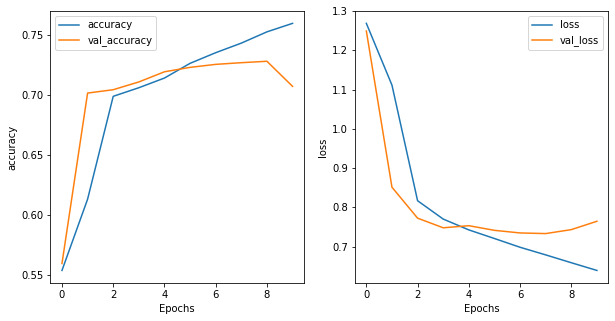

In [ ]:
fig , (ax1 , ax2) = plt.subplots(nrows=1 , ncols=2,figsize=(10,5))
# plot accuracy 
ax1.plot(history.history["accuracy"],label="accuracy")
ax1.plot(history.history["val_accuracy"],label="val_accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("accuracy")
ax1.legend()
# plot loss
ax2.plot(history.history["loss"] , label="loss")
ax2.plot(history.history["val_loss"] , label = "val_loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("loss")

ax2.legend()
plt.show()